<a href="https://colab.research.google.com/github/daveyeajoon/Red-Wine-Quality/blob/main/Yeajoon_Project2_Red_Wine_Quality__Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [213]:
url = "/content/drive/MyDrive/08 Week/winequality-red.csv"
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Data Pre-processing**

1)Source of data
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

2) Brief description of data
This dataset is to determine the quality of red wine. 

3) What is the target?
Quality

4) Is this a classification or regression problem?
Classification

5) How many features?
12

6) How many rows of data.
1599

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
Nothing so far. Do you have any advice?

In [214]:
#Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [215]:
#Check for Duplicate
df.duplicated().any()

True

In [216]:
df.duplicated().sum()

240

In [217]:
df = df.drop_duplicates()

In [218]:
df.duplicated().sum()

0

In [219]:
# Check for missings
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [220]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# **Check univariate distributions and explore variable**

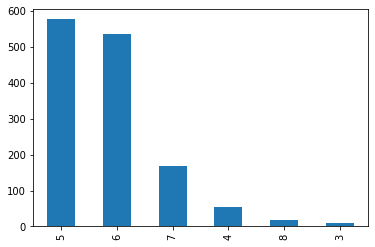

In [221]:
df['quality'].value_counts().plot(kind = 'bar');

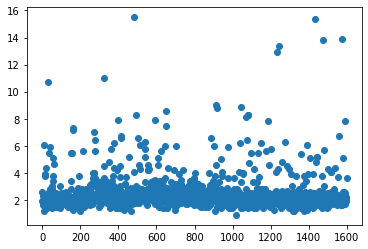

In [222]:
plt.scatter(df.index, df['residual sugar'])
plt.show()

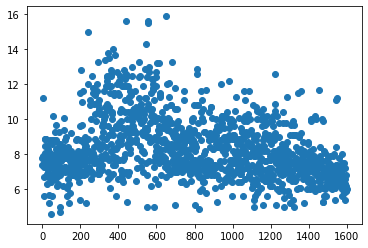

In [223]:
plt.scatter(df.index, df['fixed acidity'])
plt.show()

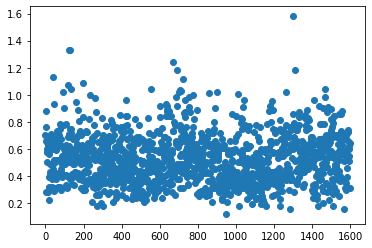

In [224]:
plt.scatter(df.index, df['volatile acidity'])
plt.show()

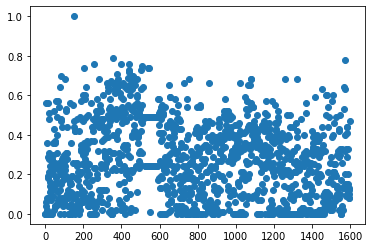

In [225]:
plt.scatter(df.index, df['citric acid'])
plt.show()

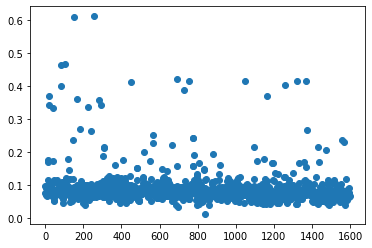

In [226]:
plt.scatter(df.index, df['chlorides'])
plt.show()

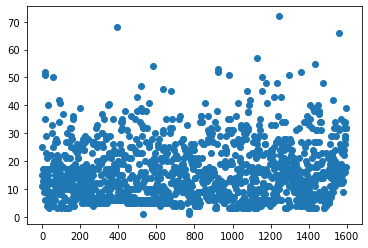

In [227]:
plt.scatter(df.index, df['free sulfur dioxide'])
plt.show()

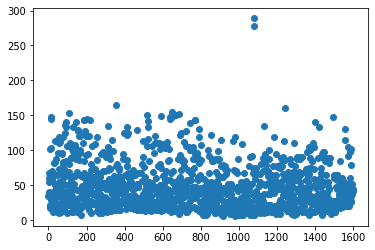

In [228]:
plt.scatter(df.index, df['total sulfur dioxide'])
plt.show()

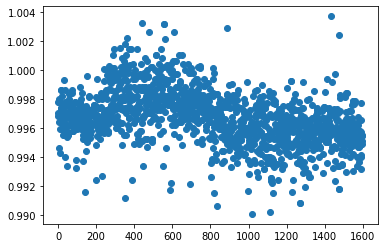

In [229]:
plt.scatter(df.index, df['density'])
plt.show()

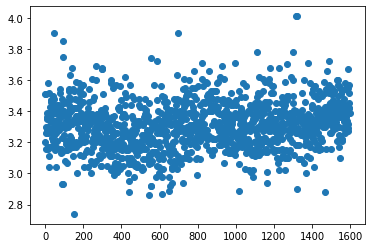

In [230]:
plt.scatter(df.index, df['pH'])
plt.show()

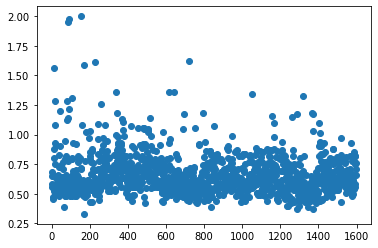

In [231]:
plt.scatter(df.index, df['sulphates'])
plt.show()

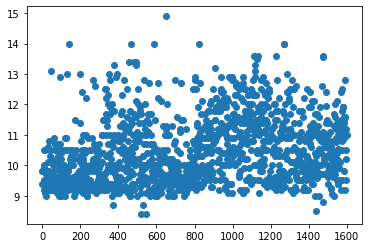

In [232]:
plt.scatter(df.index, df['alcohol'])
plt.show()

In [233]:
#Outliers
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **Corrleation and Data Visualizations**

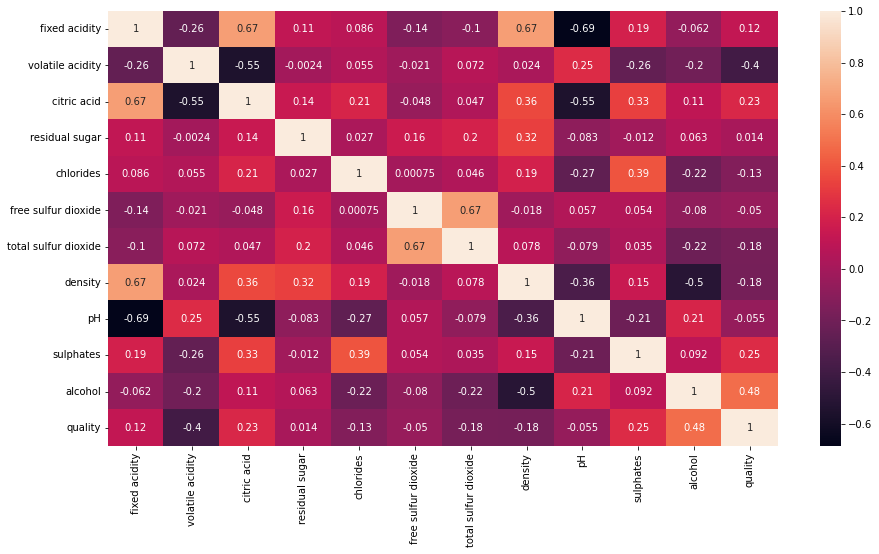

In [234]:
#Relationships between features
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True);

I can see that my target 'quality' has corrleation with alcohol.
Also, quality would be very important to the wine related business.

In [235]:
x = df[['fixed acidity', 'citric acid','density', 'sulphates','alcohol','quality']]

In [236]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled[:5]

array([[-0.52443096, -1.39325797,  0.58400336, -0.57856134, -0.95437429,
        -0.7570404 ],
       [-0.29406274, -1.39325797,  0.04873719,  0.12482157, -0.5845748 ,
        -0.7570404 ],
       [-0.29406274, -1.18861732,  0.15579042, -0.05102416, -0.5845748 ,
        -0.7570404 ],
       [ 1.66406712,  1.47171108,  0.69105659, -0.46133086, -0.5845748 ,
         0.45762065],
       [-0.52443096, -1.39325797,  0.58400336, -0.57856134, -0.95437429,
        -0.7570404 ]])

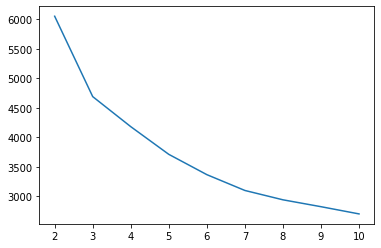

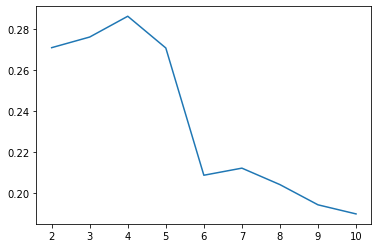

In [237]:
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(x_scaled)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(x_scaled, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)


In [238]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [239]:
df_an = df.copy()

df_an['cluster'] = kmeans.labels_

df_an.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,2


In [240]:
cluster_groups = df_an.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.378086,0.466142,0.251173,2.389660,0.070364,16.371914,39.429012,0.994644,3.384012,0.674167,11.779733,6.320988
1,1,10.650482,0.436013,0.490096,2.867685,0.090534,14.295820,41.327974,0.998558,3.195209,0.689357,10.434512,5.797428
2,2,7.615515,0.611152,0.164439,2.449770,0.084859,16.269585,51.564516,0.996770,3.343978,0.582166,9.828955,5.204301
3,3,8.679452,0.480411,0.400685,2.306849,0.185795,17.219178,60.821918,0.997449,3.163562,1.142055,9.823288,5.520548


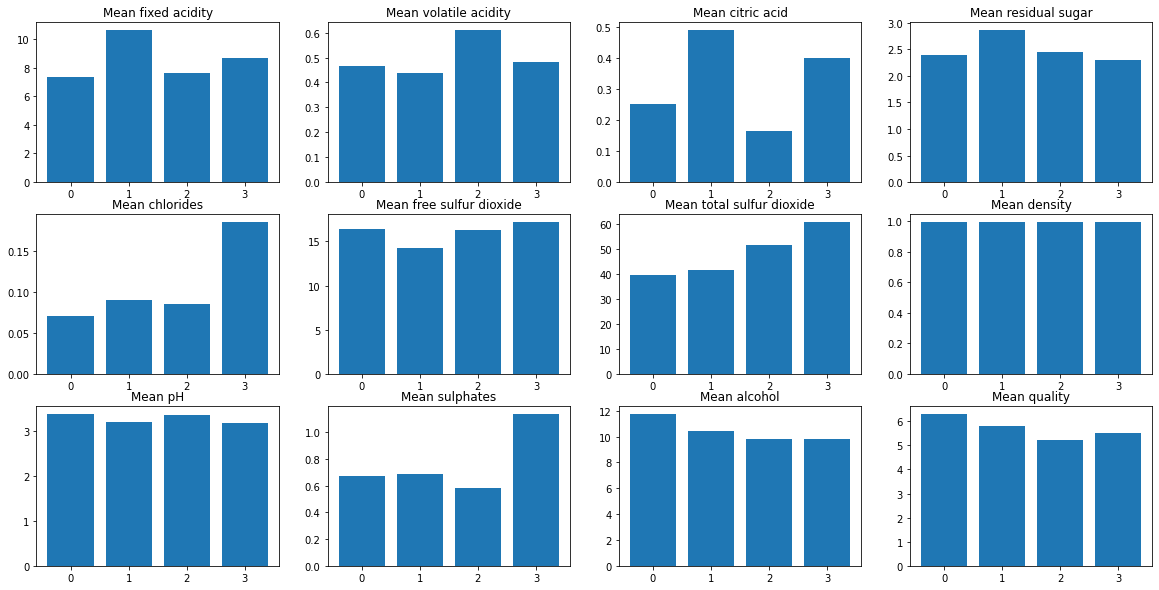

In [241]:
fig, axes = plt.subplots(3,4, figsize = (20, 10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')
  axes[i].set_xticks([0,1,2,3])

I used cluster plots to compare.
Group 2 showed the highest mean quality which also alcohol rate was the higest.


In [242]:
import plotly.express as px

px.scatter_3d(df_an, y = 'alcohol', x='quality', z='chlorides', color = 'cluster')

3D Plot shows that high quality has high alcohol and low chlorides.
This data would help how to produce wine effective.

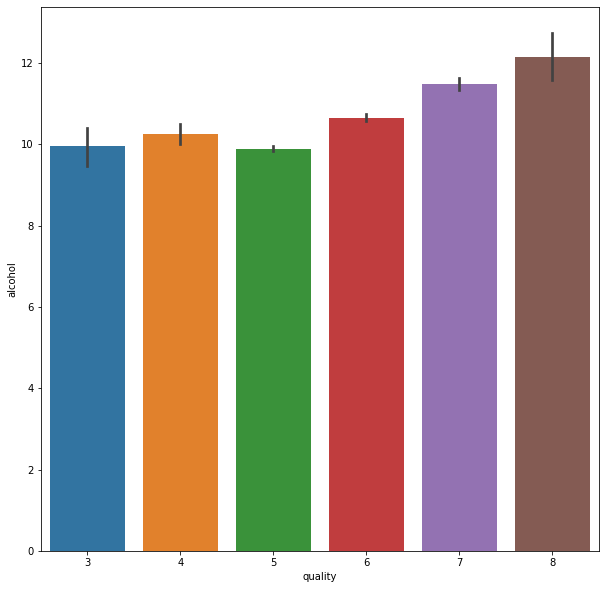

In [243]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

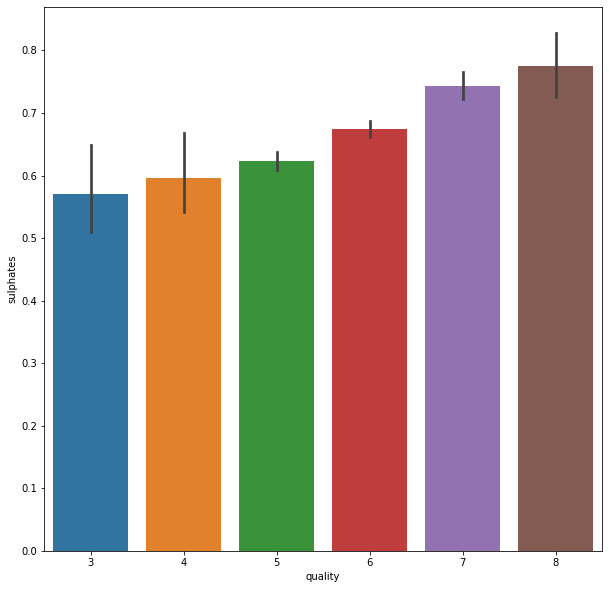

In [244]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

Quality goes higher when sulphates also goes higher.

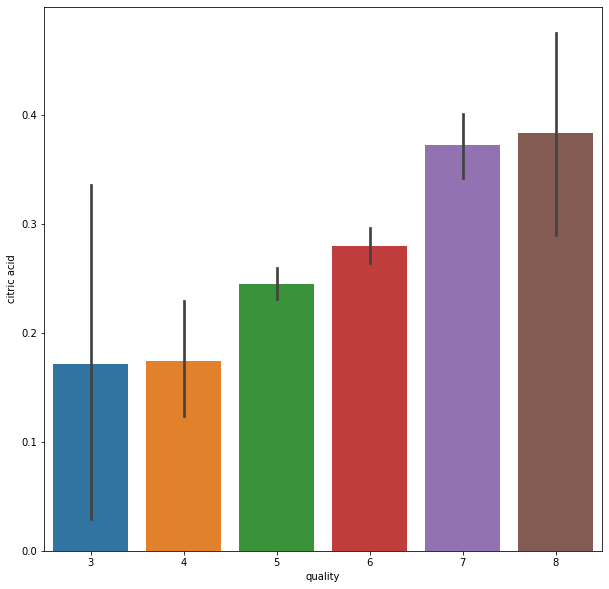

In [245]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

Sames as sulphates, higher quality has higher citric acid.

# **Models**

## Arrange Data & Validation Split

In [246]:
#According to Kaggle, Quality over 6.5 is good so I am going to change Quality to Categorical.
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [247]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad


In [248]:
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

In [249]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [250]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [251]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# **Logistic Regression**

In [252]:
lr = LogisticRegression(C = 1, fit_intercept = True, max_iter = 1000, penalty ='l2', solver = 'liblinear')
lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [253]:
#Prediction Model
lr_pred = lr.predict(X_test_scaled)

In [254]:
#Cross-Validation & Accuracy Score
cv = cross_val_score(estimator = lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("Cross Validation Score : ", cv.mean())

accuracy = accuracy_score(y_test, lr_pred)
print("Test set accuracy: ", accuracy)

Cross Validation Score :  0.8645602795573677
Test set accuracy:  0.8970588235294118


In [255]:
cf=confusion_matrix(y_test,lr_pred)

cf

array([[289,   7],
       [ 28,  16]])

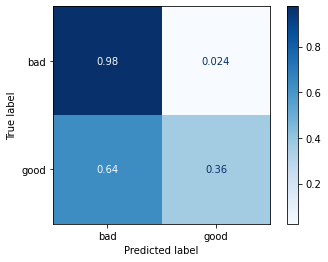

In [256]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, display_labels=labels, cmap='Blues', normalize='true');

## **PCA KNN Classifier**

In [257]:
pca = PCA(n_components=.95)

In [258]:
pca_pipe = make_pipeline(scaler, pca)

In [259]:
knn = KNeighborsClassifier()

In [260]:
pca_knn_pipe = make_pipeline(pca_pipe, knn)
pca_knn_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [261]:
pca_train_preds = pca_knn_pipe.predict(X_train)
pca_test_preds = pca_knn_pipe.predict(X_test)

In [262]:
#Classification Report for PCA_KNN Model
print(classification_report(y_test, pca_test_preds))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       296
           1       0.47      0.34      0.39        44

    accuracy                           0.86       340
   macro avg       0.69      0.64      0.66       340
weighted avg       0.85      0.86      0.86       340

